In [43]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']   = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [37]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NAN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [38]:
df_DA_US['salary_year_avg'].sample(10).sort_values(ascending=False)

536167    155000.0
445483    115000.0
581853     99500.0
727885     95000.0
398826     85000.0
322132     72500.0
204128     65000.0
89291      63991.0
483997     56500.0
160498     53500.0
Name: salary_year_avg, dtype: float64

<Axes: >

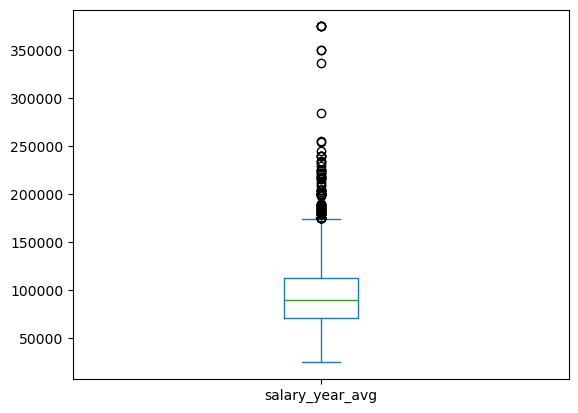

In [39]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x1e03813b610>,
 'caps': [<matplotlib.lines.Line2D at 0x1e03813a850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e03813b750>],
 'medians': [<matplotlib.lines.Line2D at 0x1e03813a490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e03813a350>],
 'means': []}

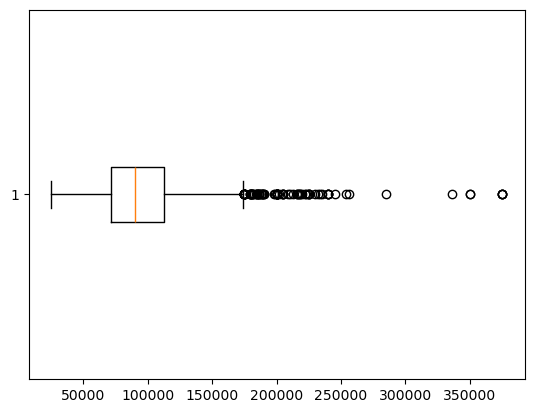

In [40]:
plt.boxplot(df_DA_US['salary_year_avg'], vert=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2652\3261556302.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert=False)


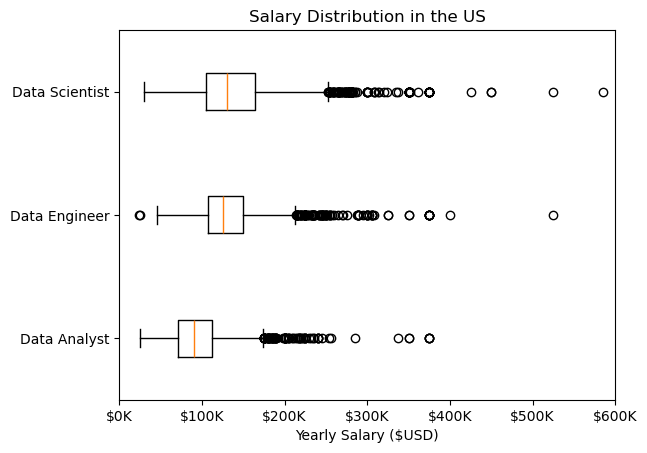

In [41]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# Filter the Data to appropriate job titles
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert=False)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
plt.show()

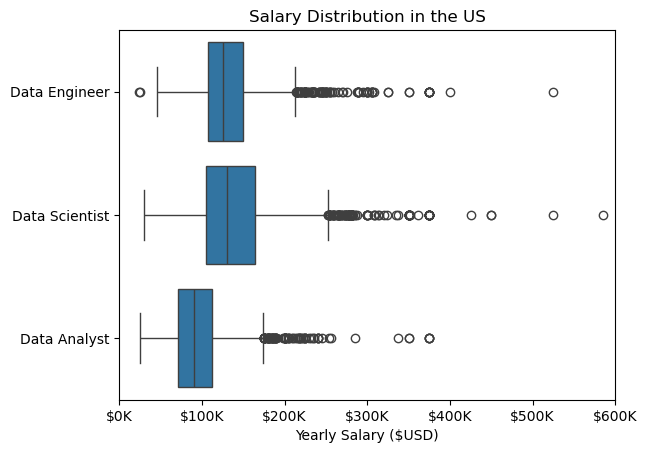

In [46]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short', orient='h')

plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()